In [1]:
!pip install ISLP

(a) Explore the data graphically to investigate the association between Purchase and the other features. Which additional features seem most likely to help predict Purchase? Scatterplots and boxplots may be valuable tools to answer this question. Describe your findings.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score


# Load your dataset
df = load_data('OJ')

# Check for NaN values
nan_values = df.isna().sum()
print("NaN Values in each column:")
print(nan_values)

# Check for any missing values
missing_values = df.isnull().sum()
print("\nMissing Values in each column:")
print(missing_values)



NaN Values in each column:
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64

Missing Values in each column:
Purchase          0
WeekofPurchase    0
StoreID           0
PriceCH           0
PriceMM           0
DiscCH            0
DiscMM            0
SpecialCH         0
SpecialMM         0
LoyalCH           0
SalePriceMM       0
SalePriceCH       0
PriceDiff         0
Store7            0
PctDiscMM         0
PctDiscCH         0
ListPriceDiff     0
STORE             0
dtype: int64


In [3]:
# Statistical summary of numerical features
numerical_summary = df.describe()
print("\nStatistical Summary of Numerical Features:")
print(numerical_summary)

# For categorical data, we can use value_counts to understand the distribution
print("\nValue Counts for Categorical Features:")
for column in df.select_dtypes(include=['object', 'category']):
    print(f"\nDistribution in {column}:")
    print(df[column].value_counts())



Statistical Summary of Numerical Features:
       WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     3.959813     1.867421     2.085411     0.051860   
std         15.558286     2.308984     0.101970     0.134386     0.117474   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.123364     0.147664     0.161682     0.565782     1.962047   
std       0.213834     0.354932     0.36

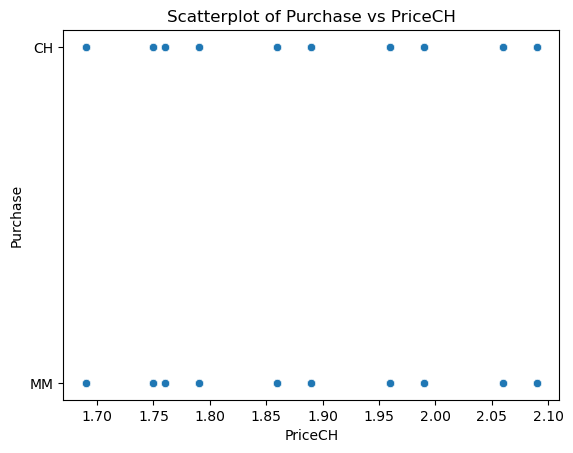

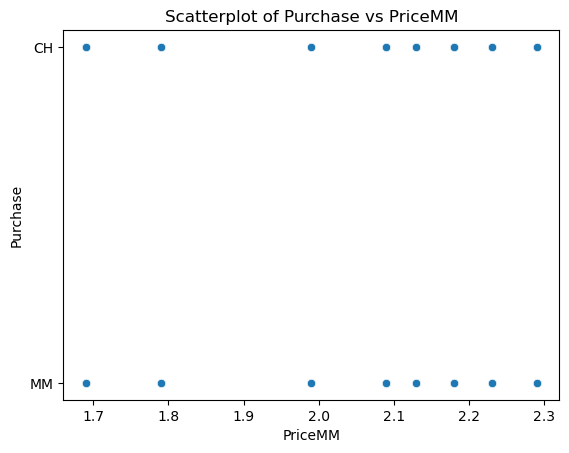

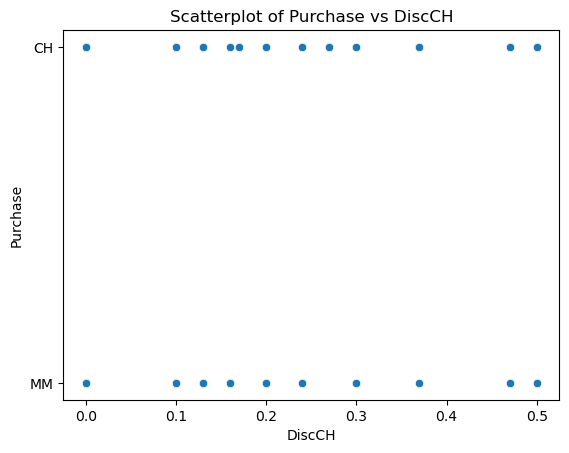

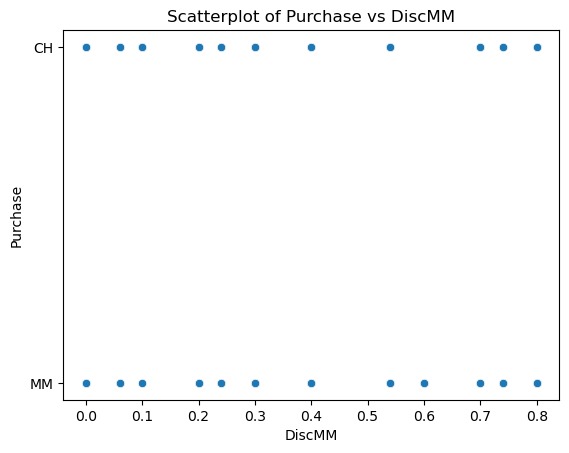

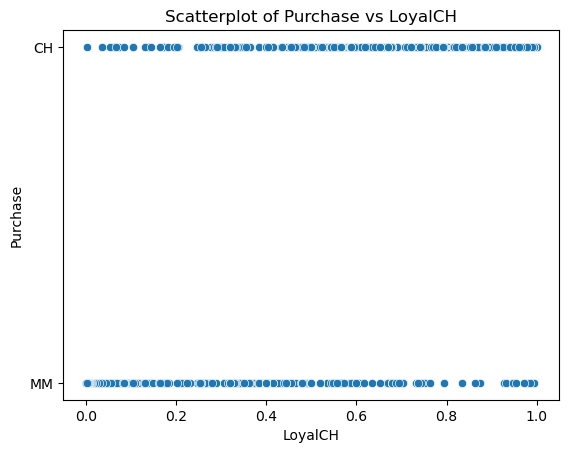

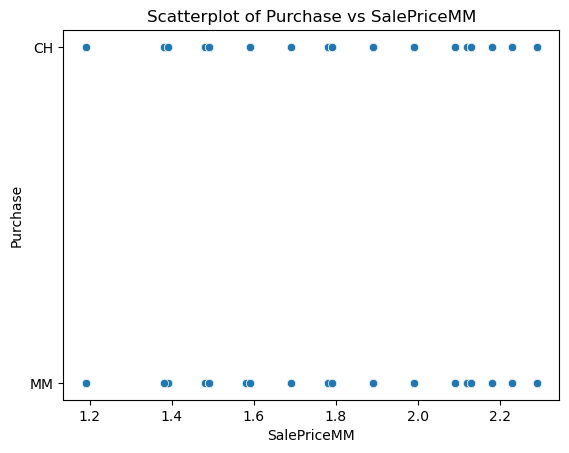

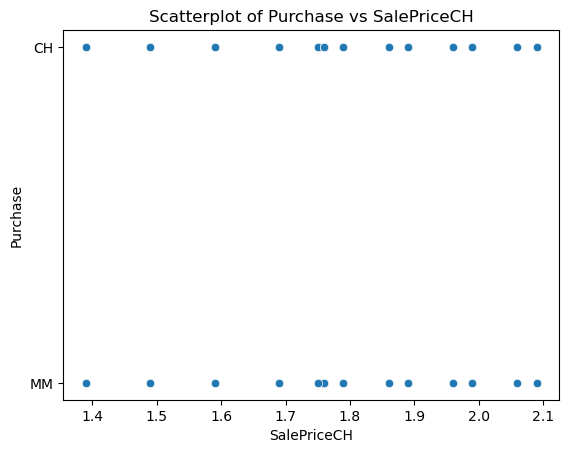

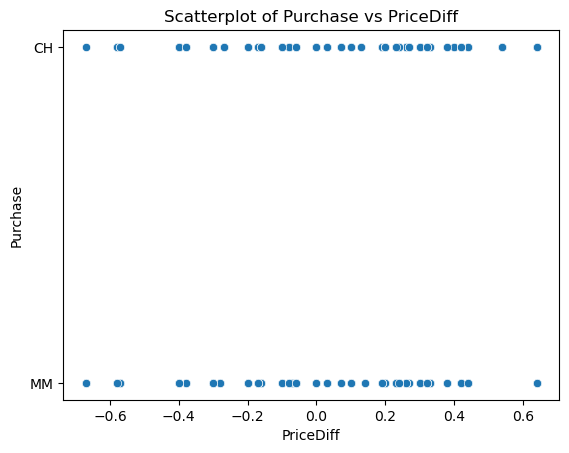

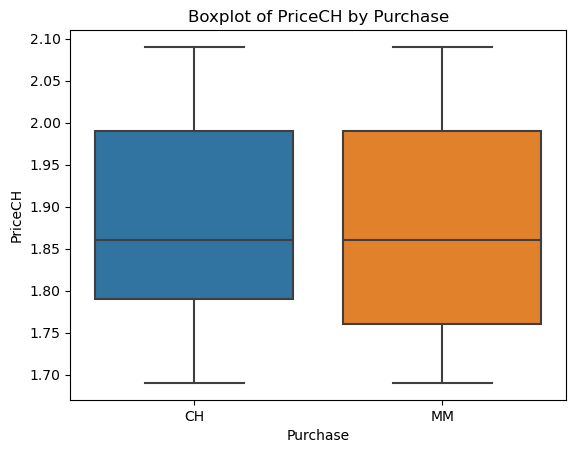

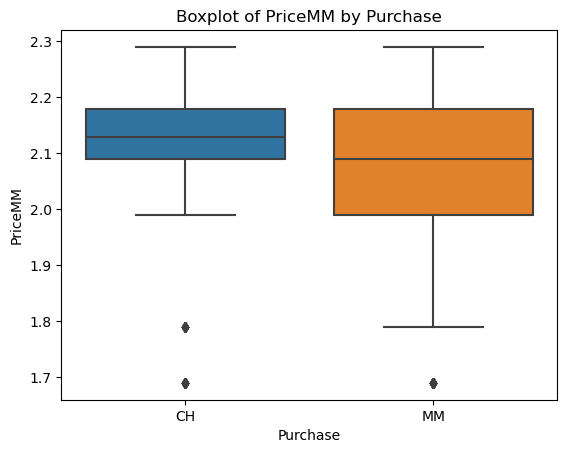

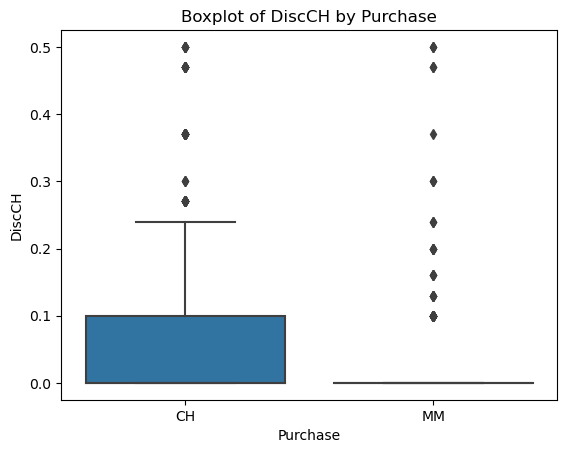

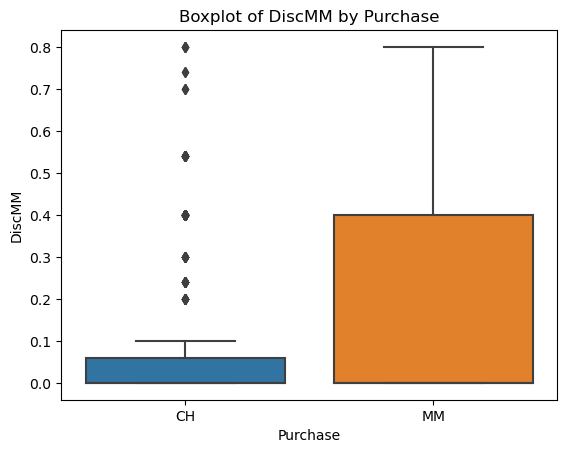

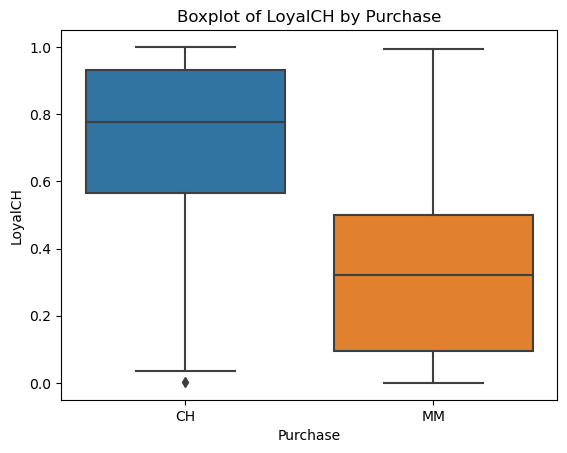

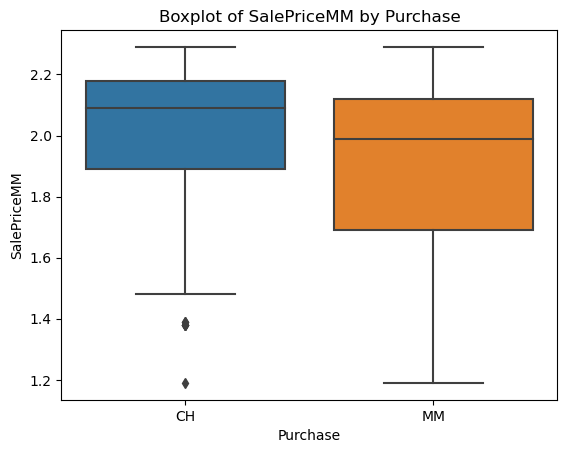

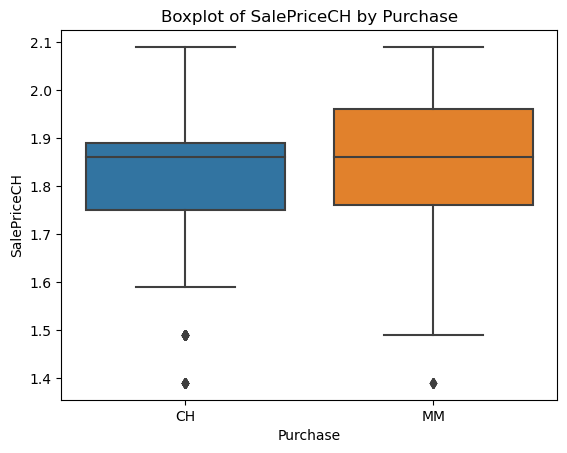

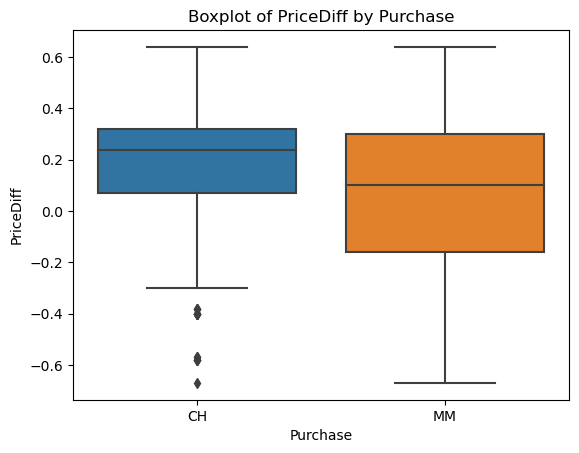

In [4]:

# Scatterplots
continuous_vars = ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH', 'SalePriceMM', 'SalePriceCH', 'PriceDiff']
for var in continuous_vars:
    sns.scatterplot(data=df, x=var, y='Purchase')
    plt.title(f'Scatterplot of Purchase vs {var}')
    plt.show()

# Boxplots
for var in continuous_vars:
    sns.boxplot(x='Purchase', y=var, data=df)
    plt.title(f'Boxplot of {var} by Purchase')
    plt.show()


We may infer a number of inferences on the features that may be most predictive of the 'Purchase' choice by looking at both scatterplots and boxplots for different features versus the 'Purchase' variable:

1. **LoyalCH**: - Higher loyalty levels strongly correlate with the purchase of CH, making loyalty scores a powerful predictor of 'Purchase'. Both scatter and boxplots demonstrate this, showing that CH purchases are linked to better loyalty scores.

2. **PriceDiff**: - The cost differential between MM and CH is an additional crucial consideration. Boxplots and scatterplots demonstrate that CH tends to be purchased more frequently when it is priced similarly to or less expensive than MM. On the other hand, MM is bought more frequently when it is less expensive.

3. **DiscCH and DiscMM** : - It seems that discounts on CH and MM affect the decision to buy, with higher MM discounts being associated with MM purchases and higher CH discounts being associated with CH purchases. The scatterplots, however, did not clearly display a pattern for discounts, indicating that although they are important, they might interact with other variables like relative pricing or loyalty.

4. **PriceCH and PriceMM**: The scatterplots show that the actual prices of CH and MM appear less predictive when taken as a pair. The boxplots, however, indicate that there are some disparities in the median prices between CH and MM purchases, indicating that the pricing context—possibly in relation to other things like discounts—may be important.

5. **Selling Price MM and Selling Price CH**: In contrast to "PriceDiff" and "LoyalCH," the selling prices also exhibit some variance in the median values between CH and MM purchases; however, the predictive potential is less evident.

To summarize, it appears that **'LoyalCH'** and **'PriceDiff'** are the most plausible options to assist in predicting 'Purchase'.

(b) Create a training set containing a random sample of 800 observations and a test set containing the remaining observations.

In [5]:
# Split the data into training and test sets
train_df, test_df = train_test_split(df, train_size=800, random_state=42)

print(train_df)

     Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
323        CH             271        3     1.99     2.09    0.10    0.40   
261        CH             270        2     1.86     2.18    0.00    0.00   
974        MM             244        1     1.86     2.09    0.00    0.00   
1031       CH             269        4     1.99     2.09    0.10    0.00   
528        CH             250        2     1.89     2.09    0.00    0.00   
...       ...             ...      ...      ...      ...     ...     ...   
330        MM             262        1     1.76     1.99    0.00    0.40   
466        CH             269        7     1.86     2.13    0.27    0.00   
121        CH             261        1     1.76     1.99    0.00    0.00   
1044       CH             241        1     1.86     1.99    0.00    0.30   
860        CH             274        7     1.86     2.13    0.47    0.54   

      SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
323       

(c) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. What is the training error rate?


In [6]:
# Separate the predictors and response
X_train = train_df.drop('Purchase', axis=1)  # This drops the response column from the dataset

# Label encoding for binary 'Yes'/'No' values
label_encoder = LabelEncoder()
X_train['Store7'] = label_encoder.fit_transform(X_train['Store7'])

# Separate the predictors and response
# X_train should now only contain numeric values
y_train = train_df['Purchase']

# Initialize the decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
tree_clf.fit(X_train, y_train)

# Predict the responses for the training data
train_predictions = tree_clf.predict(X_train)

# Calculate the accuracy score for the training data
train_accuracy = accuracy_score(y_train, train_predictions)

# Training error rate is 1 - accuracy score
training_error_rate = 1 - train_accuracy

# Output the training error rate
print(f"Training Error Rate: {training_error_rate:.4f}")


Training Error Rate: 0.0075


(d) Create a plot of the tree and interpret the results. How many terminal nodes does the tree have?

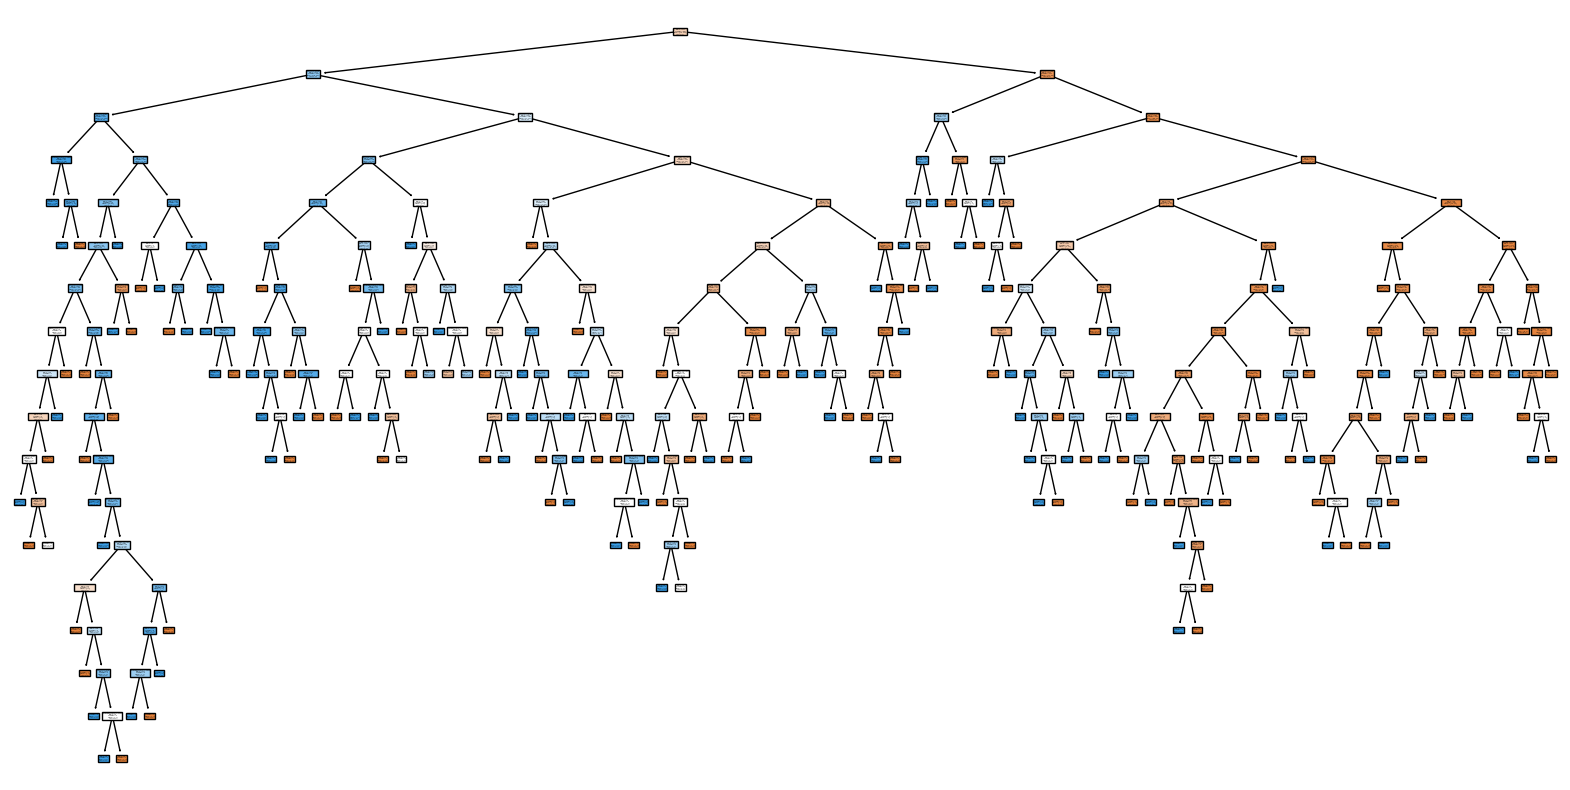

The number of terminal nodes (leaves) in the tree is: 163


In [8]:

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(tree_clf, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.show()

# Count the number of terminal nodes (leaves)
n_nodes = tree_clf.tree_.node_count
children_left = tree_clf.tree_.children_left
children_right = tree_clf.tree_.children_right

# Terminal nodes will have -1 for children left and right
terminal_nodes = sum(children_left == children_right)
print(f"The number of terminal nodes (leaves) in the tree is: {terminal_nodes}")


(e) Predict the response on the test data and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

In [9]:



# Separate the predictors and response in the test set
X_test = test_df.drop('Purchase', axis=1)  # predictors
y_test = test_df['Purchase']  # response

# since we have categorical features like 'Store7', encode them as was done with the training set
# 'Store7' is a categorical feature in our test set:
X_test['Store7'] = label_encoder.transform(X_test['Store7'])

# Predict the responses for the test data
test_predictions = tree_clf.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the accuracy score for the test data
test_accuracy = accuracy_score(y_test, test_predictions)

# Test error rate is 1 - accuracy score
test_error_rate = 1 - test_accuracy
print(f"Test Error Rate: {test_error_rate:.4f}")


Confusion Matrix:
[[121  38]
 [ 37  74]]
Test Error Rate: 0.2778


(f) Use cross-validation on the training set to determine the optimal tree size.

In [10]:

# Cost complexity pruning path
ccp_path = tree_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas

# Cross-validation to find the optimal tree size
kfold = KFold(10, random_state=1, shuffle=True)
grid = GridSearchCV(tree_clf, {'ccp_alpha': ccp_alphas}, cv=kfold, scoring='accuracy')
grid.fit(X_train, y_train)

# Best score and estimator from grid search
print(f"Best Cross-Validated Score: {grid.best_score_}")
print(f"Best Estimator: {grid.best_estimator_}")

Best Cross-Validated Score: 0.8174999999999999
Best Estimator: DecisionTreeClassifier(ccp_alpha=0.003308519437551706, random_state=42)


(g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

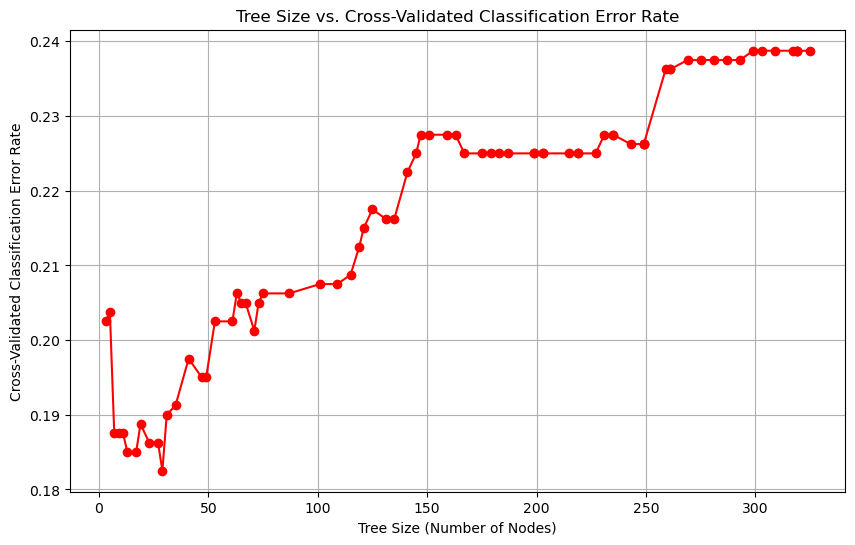

In [11]:
# Initialize lists to store tree sizes and corresponding error rates
tree_sizes = []
error_rates = []

# Fit a decision tree for each ccp_alpha and record its size
for alpha in ccp_alphas:
    trees_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    trees_clf.fit(X_train, y_train)
    tree_sizes.append(trees_clf.tree_.node_count)  # Number of nodes in the tree

    # Perform cross-validation and compute error rate
    cv_scores = cross_val_score(trees_clf, X_train, y_train, cv=kfold, scoring='accuracy')
    error_rate = 1 - np.mean(cv_scores)
    error_rates.append(error_rate)

# Plot tree size vs cross-validated classification error rate
plt.figure(figsize=(10, 6))
plt.plot(tree_sizes[:-1], error_rates[:-1], marker='o', linestyle='-', color='red')  # Exclude the last value (maximum alpha leading to the trivial tree)
plt.xlabel('Tree Size (Number of Nodes)')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.title('Tree Size vs. Cross-Validated Classification Error Rate')
plt.grid(True)
plt.show()


(h) Which tree size corresponds to the lowest cross-validated classification error rate?

In [12]:
min_error_rate = error_rates.index(min(error_rates))
optimal_tree_size = tree_sizes[min_error_rate]

print("Tree size with minimum classification error rate is : " + str(optimal_tree_size))


Tree size with minimum classification error rate is : 29


(i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selecting a pruned tree, then create a pruned tree with five terminal nodes.

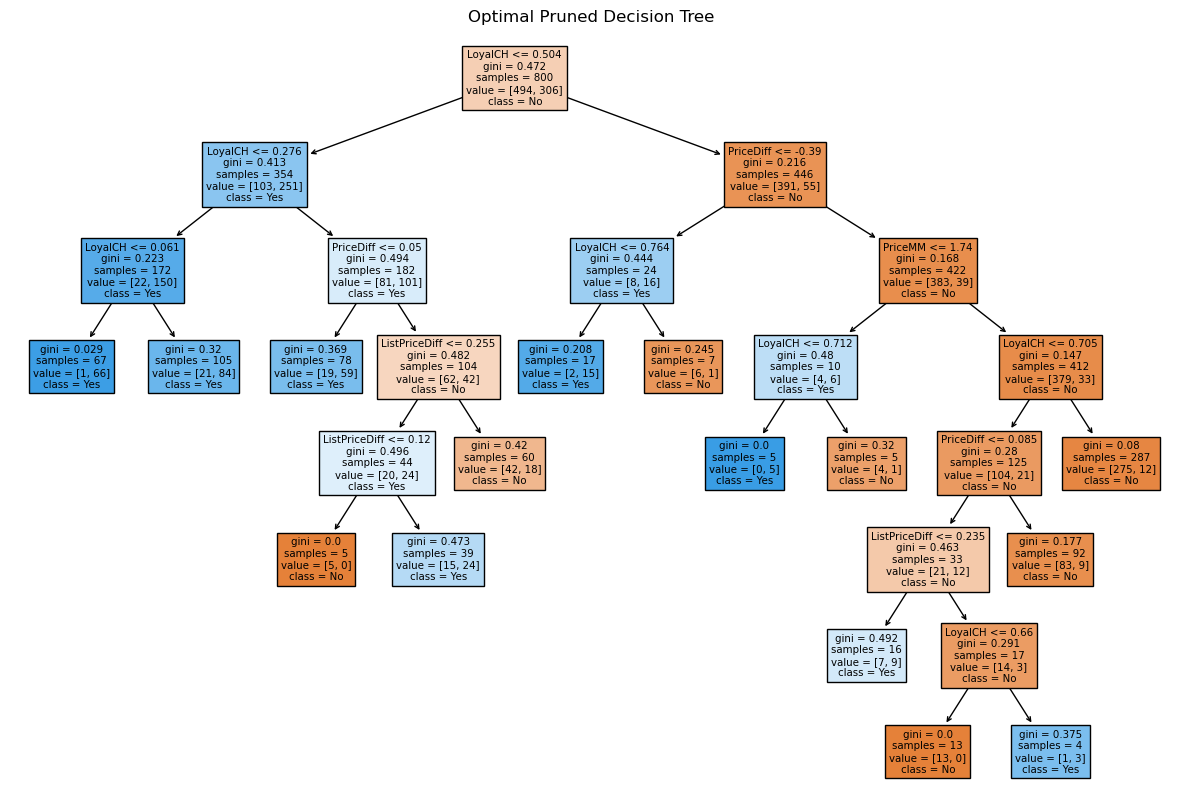

In [14]:
# now we could use the optimal ccp_alpha value
optimal_ccp_alpha = 0.003308519437551706

# Initialize the decision tree classifier with the optimal ccp_alpha
optimal_tree_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=optimal_ccp_alpha)

# Fit the model to the training data
optimal_tree_clf.fit(X_train, y_train)

# Check if the tree is pruned or not
if optimal_tree_clf.tree_.node_count == optimal_tree_clf.tree_.n_leaves:
    # If the tree is not pruned (only one node per leaf), then prune it to have five leaves
    optimal_tree_clf = DecisionTreeClassifier(random_state=42, max_leaf_nodes=5)
    optimal_tree_clf.fit(X_train, y_train)

# Now plot the tree
plt.figure(figsize=(15, 10))
plot_tree(optimal_tree_clf, filled=True, feature_names=X_train.columns, class_names=['No', 'Yes'])
plt.title('Optimal Pruned Decision Tree')
plt.show()


(j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

In [15]:
# Predict the training set labels
pruned_train_predictions = optimal_tree_clf.predict(X_train)

# Calculate the training error rate for the pruned tree
pruned_training_error_rate = 1 - accuracy_score(y_train, pruned_train_predictions)

print(f"Training Error Rate for the Pruned Tree : {pruned_training_error_rate:.4f}")

# print the training error rate
print(f"Training Error Rate for unpruned tree: {training_error_rate:.4f}")

Training Error Rate for the Pruned Tree : 0.1338
Training Error Rate for unpruned tree: 0.0075


(k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

In [16]:
# Predict the test set labels with the pruned tree
pruned_test_predictions = optimal_tree_clf.predict(X_test)

# Calculate the test error rate for the pruned tree
pruned_test_error_rate = 1 - accuracy_score(y_test, pruned_test_predictions)

# print the test error rates
print(f"Test Error Rate for the Unpruned Tree: {test_error_rate:.4f}")
print(f"Test Error Rate for the Pruned Tree: {pruned_test_error_rate:.4f}")




Test Error Rate for the Unpruned Tree: 0.2778
Test Error Rate for the Pruned Tree: 0.2444


Test error rate of unpruned tree is a bit higher than the pruned tree.